# Prosper Loan Data: Exploratory Analysis
## by Engi Amin

## Preliminary Wrangling

The prosper loan dataset is financial dataset that shows the current status of loans by Prosper Marketplace, Inc. Prosper is a San Francisco, California-based company specialized in peer-to-peer lending industry (https://www.prosper.com/). The dataset consists of 113937 data entries for 81 variables including characteristics of the borrower, loan and investors.


The goal of this analysis is to explore the factors that affect a loan’s outcome status.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print first five rows
df = pd.read_csv("prosperLoanData.csv")
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
# high-level overview of data shape and composition
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
print('The number of rows in the dataset is {}.'.format(df.shape[0]))
print('The number of columns in the dataset is {}.'.format(df.shape[1]))

The number of rows in the dataset is 113937.
The number of columns in the dataset is 81.


In [5]:
# descriptive statistics for numeric variables
print(df.describe())

       ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.

### What is the structure of your dataset?

There are 113,937 loan records in the dataset with 81 features. Most variables are numeric in nature.

### What is/are the main feature(s) of interest in your dataset?

The main feature of interest (response variable) is `LoanStatus` which defines the current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, or PastDue.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The features that would support the investigation (independent variables) are: 
- `Term`: the length of the loan expressed in months.
- `ProsperRating (numeric)`: The  Prosper Rating assigned at the time the listing was created.
- `ProsperScore`: A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.
- `ListingCategory`: The category of the listing that the borrower selected when posting their listing
- `EmploymentStatus`: The employment status of the borrower at the time they posted the listing.
- `EmploymentStatusDuration`: The length in months of the employment status at the time the listing was created.
- `IsBorrowerHomeowner`: A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
- `DebtToIncomeRatio`: The debt to income ratio of the borrower at the time the credit profile was pulled.
- `IncomeRange`: The income range of the borrower at the time the listing was created.
- `LoanOriginalAmount`: The origination amount of the loan.
- `CurrentCreditLines`: Number of current credit lines at the time the credit profile was pulled.

## Data Cleaning
We need to clean the dataset before performing any exploration. We will only keep the variables relevant to the goal of the analysis.

In [6]:
new_df = df[['LoanStatus', 'Term', 'ProsperRating (numeric)', 'ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatus', 'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'DebtToIncomeRatio','IncomeRange',  'LoanOriginalAmount', 'CurrentCreditLines' ]]
new_df.head()

,LoanStatus,Term,ProsperRating (numeric),ProsperScore,ListingCategory (numeric),EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,DebtToIncomeRatio,IncomeRange,LoanOriginalAmount,CurrentCreditLines
0,Completed,36,NaN,NaN,0,Self-employed,2.0,True,0.17,"$25,000-49,999",9425,5.0
1,Current,36,6.0,7.0,2,Employed,44.0,False,0.18,"$50,000-74,999",10000,14.0
2,Completed,36,NaN,NaN,0,Not available,NaN,False,0.06,Not displayed,3001,NaN
3,Current,36,6.0,9.0,16,Employed,113.0,True,0.15,"$25,000-49,999",10000,5.0
4,Current,36,3.0,4.0,2,Employed,44.0,True,0.26,"$100,000+",15000,19.0


In [7]:
# high-level overview of data shape and composition
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 12 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   LoanStatus                 113937 non-null  object 
 1   Term                       113937 non-null  int64  
 2   ProsperRating (numeric)    84853 non-null   float64
 3   ProsperScore               84853 non-null   float64
 4   ListingCategory (numeric)  113937 non-null  int64  
 5   EmploymentStatus           111682 non-null  object 
 6   EmploymentStatusDuration   106312 non-null  float64
 7   IsBorrowerHomeowner        113937 non-null  bool   
 8   DebtToIncomeRatio          105383 non-null  float64
 9   IncomeRange                113937 non-null  object 
 10  LoanOriginalAmount         113937 non-null  int64  
 11  CurrentCreditLines         106333 non-null  float64
dtypes: bool(1), float64(5), int64(3), object(3)
memory usage: 9.7+ MB


In [8]:
print(new_df.describe())

                Term  ProsperRating (numeric)  ProsperScore  \
count  113937.000000             84853.000000  84853.000000   
mean       40.830248                 4.072243      5.950067   
std        10.436212                 1.673227      2.376501   
min        12.000000                 1.000000      1.000000   
25%        36.000000                 3.000000      4.000000   
50%        36.000000                 4.000000      6.000000   
75%        36.000000                 5.000000      8.000000   
max        60.000000                 7.000000     11.000000   

       ListingCategory (numeric)  EmploymentStatusDuration  DebtToIncomeRatio  \
count              113937.000000             106312.000000      105383.000000   
mean                    2.774209                 96.071582           0.275947   
std                     3.996797                 94.480605           0.551759   
min                     0.000000                  0.000000           0.000000   
25%                     1.0

In [9]:
# Issue 1

## Change 0 in ProsperRating (numeric) to NA
new_df.loc[new_df['ProsperRating (numeric)'] == 0, 'ProsperRating (numeric)'] = np.nan

C:\Users\engia\Anaconda3\lib\site-packages\pandas\core\indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)


In [10]:
# Issue 2

## Change ListingCategory (numeric) to categories
## source: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.CategoricalIndex.map.html
map_dic = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
             4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 
             9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
             13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle',
             17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

new_df['ListingCategory'] = new_df['ListingCategory (numeric)'].map(map_dic).astype('object')

C:\Users\engia\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [11]:
new_df['ListingCategory'].value_counts()

Debt Consolidation    58308
Not Available         16965
Other                 10494
Home Improvement       7433
Business               7189
Auto                   2572
Personal Loan          2395
Household Expenses     1996
Medical/Dental         1522
Taxes                   885
Large Purchases         876
Wedding Loans           771
Vacation                768
Student Use             756
Motorcycle              304
Engagement Ring         217
Baby&Adoption           199
Cosmetic Procedure       91
Boat                     85
Green Loans              59
RV                       52
Name: ListingCategory, dtype: int64

In [12]:
# Change Not Available in ListingCategory to NA
new_df.loc[new_df['ListingCategory'] == 'Not Available', 'ListingCategory'] = np.nan

In [13]:
# Drop column ListingCategory (numeric)
new_df.drop(['ListingCategory (numeric)'], axis=1, inplace=True)

C:\Users\engia\Anaconda3\lib\site-packages\pandas\core\frame.py:4169: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [14]:
# Issue 3
# Taking a look at LoanStatus
new_df['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64

In [15]:
# For sake of simplicity, group all past due loans together

new_df.loc[(new_df['LoanStatus'].str.contains('Past Due', regex = True)), 'LoanStatus'] = 'Past Due'

In [16]:
new_df['LoanStatus'].value_counts()

Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due                   2067
FinalPaymentInProgress      205
Cancelled                     5
Name: LoanStatus, dtype: int64

In [17]:
#Issue 4: EmploymentStatus
new_df['EmploymentStatus'].value_counts()

Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64

In [18]:
# Convert Not available to NaN
new_df.loc[new_df['EmploymentStatus'] == 'Not available', 'EmploymentStatus'] = np.nan

In [19]:
# Issue 5: IncomeRange

new_df['IncomeRange'].value_counts()

$25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64

In [20]:
# Merge $100,000+ and $75,000-99,999 to a level called "High"

new_df.loc[(new_df['IncomeRange'].isin(['$100,000+', '$75,000-99,999'])), 'IncomeRange'] = 'High'

In [21]:
# Merge $50,000-74,999 and $25,000-49,999 to a level called "Medium"

new_df.loc[(new_df['IncomeRange'].isin(['$50,000-74,999', '$25,000-49,999'])), 'IncomeRange'] = 'Medium'

In [22]:
# Merge $1-24,999 and $0 to a level called "Low"

new_df.loc[(new_df['IncomeRange'].isin(['$1-24,999', '$0'])), 'IncomeRange'] = 'Low'

In [23]:
# Convert Not displayed to NA
new_df.loc[new_df['IncomeRange'] == 'Not displayed', 'IncomeRange'] = np.nan

In [24]:
# Check new values
new_df['IncomeRange'].value_counts()

Medium          63242
High            34253
Low              7895
Not employed      806
Name: IncomeRange, dtype: int64

In [25]:
# Remove rows with NA entries
new_df = new_df.dropna()
new_df = new_df.reset_index(drop=True)
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77524 entries, 0 to 77523
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   LoanStatus                77524 non-null  object 
 1   Term                      77524 non-null  int64  
 2   ProsperRating (numeric)   77524 non-null  float64
 3   ProsperScore              77524 non-null  float64
 4   EmploymentStatus          77524 non-null  object 
 5   EmploymentStatusDuration  77524 non-null  float64
 6   IsBorrowerHomeowner       77524 non-null  bool   
 7   DebtToIncomeRatio         77524 non-null  float64
 8   IncomeRange               77524 non-null  object 
 9   LoanOriginalAmount        77524 non-null  int64  
 10  CurrentCreditLines        77524 non-null  float64
 11  ListingCategory           77524 non-null  object 
dtypes: bool(1), float64(5), int64(2), object(4)
memory usage: 6.6+ MB


### What is the *new* structure of your dataset?

There are now 77,524 loan records in the dataset with 12 features. Most variables are numeric in nature (Term, ProsperRating (numeric), ProsperScore,, EmploymentStatusDuration, DebtToIncomeRatio, LoanOriginalAmount and CurrentCreditLines). Four variables are categorical (LoanStatus, EmploymentStatus,  ListingCategory and IncomeRange) and one variable is binary (IsBorrowerHomeowner).

### What is/are the *new* main feature(s) of interest in your dataset?

The main interest of this project is figuring out what features have an effect on the loan status.

## Univariate Exploration

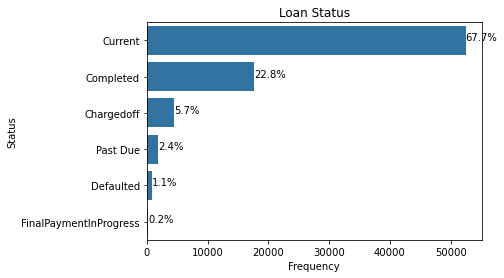

In [27]:
# First: The main variable of interest LoanStatus

color = sb.color_palette()[0]

# Source: https://datascience.stackexchange.com/questions/48035/how-to-show-percentage-text-next-to-the-horizontal-bars-in-matplotlib
order = new_df['LoanStatus'].value_counts().index

ax=sb.countplot(data = new_df, y = 'LoanStatus', order=order, color=color)
plt.xlabel('Frequency')
plt.ylabel('Status')
plt.title('Loan Status')


total = len(new_df['LoanStatus'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

The majority of loans in the dataset are still current (67.7%), 2.4% are past due and 6.8% have either been charged-off or defaulted. 

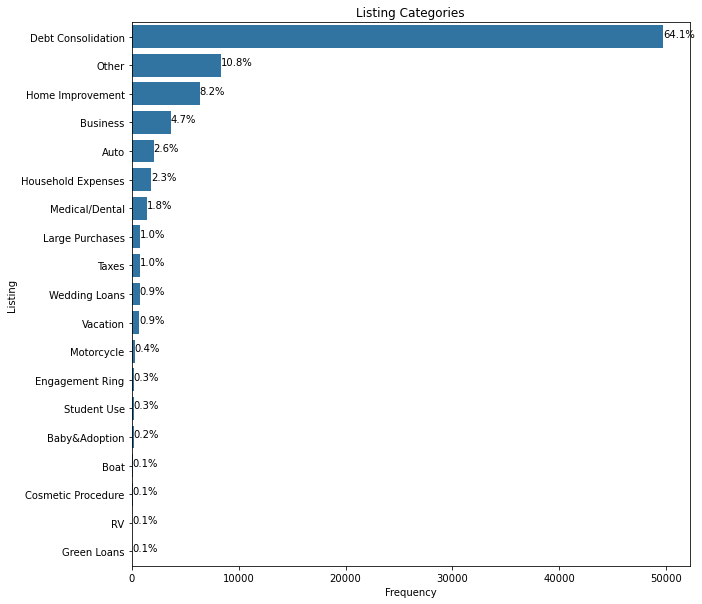

In [32]:
# Second: Listing Categories

order = new_df['ListingCategory'].value_counts().index

plt.figure(figsize=(10,10))

ax=sb.countplot(data = new_df, y = 'ListingCategory', order=order, color=color)
plt.xlabel('Frequency')
plt.ylabel('Listing')
plt.title('Listing Categories')


total = len(new_df['ListingCategory'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

plt.show()

The majority of loans are listed as debt consolidation (64.1%). 

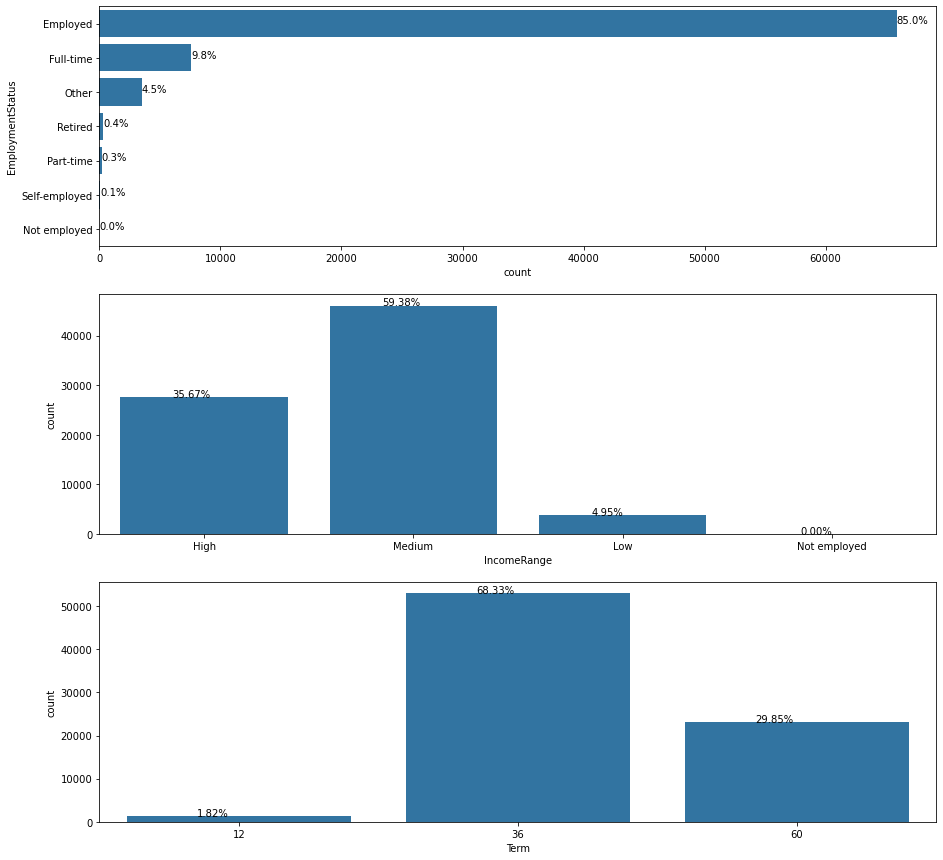

In [47]:
# Third: EmploymentStatus, IncomeRate and Term

order1 = new_df['EmploymentStatus'].value_counts().index
order2 = ['High', 'Medium', 'Low', 'Not employed']
color = sb.color_palette()[0]

fig, ax = plt.subplots(nrows=3, figsize = [15,15])


ax1 = sb.countplot(data = new_df, y = 'EmploymentStatus', order=order1, color = color, ax = ax[0])
total1 = len(new_df['EmploymentStatus'])
for p in ax1.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total1)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax1.annotate(percentage, (x, y))

ax2 = sb.countplot(data = new_df, x = 'IncomeRange', order=order2, color = color, ax = ax[1])
total2 = len(new_df['IncomeRange'])
for p in ax2.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total2)
        x = p.get_x() + p.get_width() / 5 + 0.09
        y = p.get_y() + p.get_height() 
        ax2.annotate(percentage, (x, y))


ax3= sb.countplot(data = new_df, x = 'Term', color = color, ax = ax[2])
total3 = len(new_df['Term'])
for p in ax3.patches:
        percentage = '{:.2f}%'.format(100 * p.get_height()/total3)
        x = p.get_x() + p.get_width() / 5 + 0.09
        y = p.get_y() + p.get_height() 
        ax3.annotate(percentage, (x, y))

plt.show()


The majority of borrowers are employed (85%), of a medium income range (59.38%) and ask for a 36-month loan (68.33%).

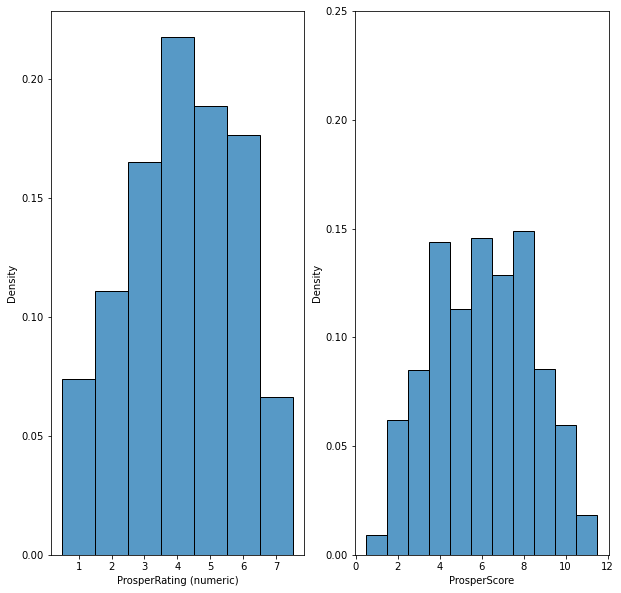

In [61]:
# Fourth: ProsperRating (numeric) and ProsperScore

color = sb.color_palette()[0]
binsize=0.75
bins1 = np.arange(1, new_df['ProsperRating (numeric)'].max()+binsize, binsize)
bins2 = np.arange(1, new_df['ProsperScore'].max()+binsize, binsize)

fig, ax = plt.subplots(nrows=1, ncols=2,figsize = [10,10])
sb.histplot( x=new_df["ProsperRating (numeric)"], color=color, bins=bins1,  ax = ax[0], discrete=True, stat='density')
sb.histplot( x=new_df["ProsperScore"] ,  color=color,  ax = ax[1], bins=bins2, discrete=True, stat='density')

plt.ylim(0,0.25)


plt.show()


Around 25% of the borrowers have an average rating by Prosper. Most borrowers have a Proposer score between 4 and 8 out of 11.

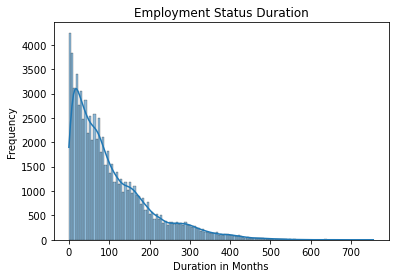

In [62]:
# Fifth: EmploymentStatusDuration

plt.ylabel('Frequency')
plt.xlabel('Duration in Months')
plt.title('Employment Status Duration')
sb.histplot( new_df["EmploymentStatusDuration"], kde=True);

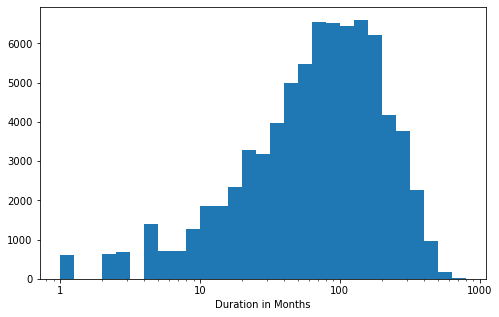

In [81]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.1
bins = 10 ** np.arange(0, np.log10(new_df["EmploymentStatusDuration"].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = new_df, x = 'EmploymentStatusDuration', bins = bins)
plt.xscale('log')
plt.xticks([1, 1e1, 1e2, 1e3], ['1', '10', '100', '1000'])
plt.xlabel('Duration in Months')
plt.show()

Employment duration has a long-tailed distribution, with many borrowers on the short duration, and few on the long duration end. When plotted on a log-scale, the duration distribution looks roughly left-skewed with a peak around the 100 month duration.

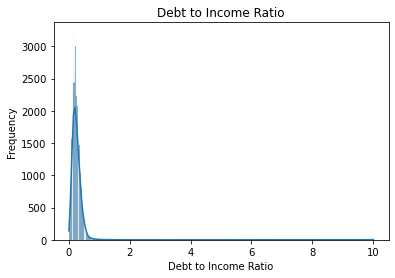

In [82]:
# Sixth: DebtToIncomeRatio
plt.ylabel('Frequency')
plt.xlabel('Debt to Income Ratio')
plt.title('Debt to Income Ratio')
sb.histplot( new_df["DebtToIncomeRatio"], kde=True);
#There appears to be high outliers

In [85]:
new_df['DebtToIncomeRatio'].describe()

count    77524.000000
mean         0.258734
std          0.318376
min          0.000000
25%          0.150000
50%          0.220000
75%          0.320000
max         10.010000
Name: DebtToIncomeRatio, dtype: float64

In [90]:
#Select high outliers: Q3 + 1.5 IQR
outlier_thr = 0.32 + (1.5 * (0.32 - 0.15))
high_outliers = (new_df['DebtToIncomeRatio'] > outlier_thr)
print(high_outliers.sum())
print(new_df.loc[high_outliers,:])

1733
       LoanStatus  Term  ProsperRating (numeric)  ProsperScore  \
17        Current    36                      1.0           2.0   
285     Defaulted    36                      1.0           3.0   
327       Current    36                      1.0           4.0   
339       Current    36                      2.0           5.0   
380     Defaulted    36                      3.0           7.0   
...           ...   ...                      ...           ...   
77370     Current    36                      1.0           3.0   
77372     Current    36                      1.0           4.0   
77378  Chargedoff    36                      2.0           4.0   
77384   Completed    36                      3.0           8.0   
77480   Completed    60                      4.0           4.0   

      EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
17               Other                      68.0                False   
285              Other                      28.0        

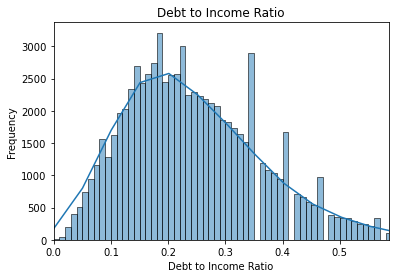

In [95]:
#Plot without outliers
binsize = 0.01
bins = np.arange(0, new_df['DebtToIncomeRatio'].max()+binsize, binsize)
plt.ylabel('Frequency')
plt.xlabel('Debt to Income Ratio')
plt.title('Debt to Income Ratio')
plt.xlim(0,outlier_thr+binsize)
sb.histplot( new_df["DebtToIncomeRatio"], kde=True, bins=bins);

There looks like there are many outlier points in debt to income ratio which will be very interesting to investigate with loan status to see if borrowers who default are the ones with high debt to income ratio.

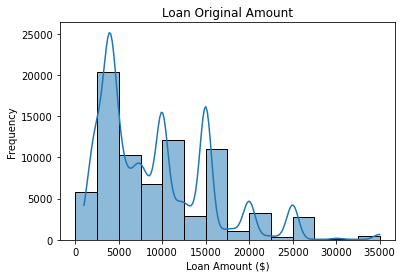

In [97]:
# Seventh:LoanOriginalAmount
binsize = 2500
bins = np.arange(0, new_df['LoanOriginalAmount'].max()+binsize, binsize)

sb.histplot( new_df["LoanOriginalAmount"], bins=bins,kde=True)
plt.ylabel('Frequency')
plt.xlabel('Loan Amount ($)')
plt.title('Loan Original Amount');

The distribution is multimodal.

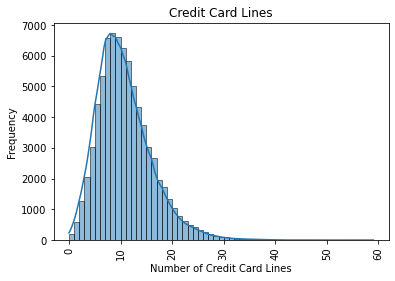

In [98]:
# Eighth:  CurrentCreditLines
binsize = 1
bins = np.arange(0, new_df['CurrentCreditLines'].max()+binsize, binsize)
sb.histplot( new_df["CurrentCreditLines"], kde=True, bins=bins)
plt.ylabel('Frequency')
plt.xlabel('Number of Credit Card Lines')
plt.title('Credit Card Lines')
plt.xticks(rotation=90);

In [99]:
new_df['CurrentCreditLines'].describe()

count    77524.000000
mean        10.590411
std          5.316064
min          0.000000
25%          7.000000
50%         10.000000
75%         13.000000
max         59.000000
Name: CurrentCreditLines, dtype: float64

In [100]:
#Select high outliers: Q3 + 1.5 IQR
outlier_thr = 13 + (1.5 * (13 - 7))
high_outliers = (new_df['CurrentCreditLines'] > outlier_thr)
print(high_outliers.sum())
print(new_df.loc[high_outliers,:])

2327
       LoanStatus  Term  ProsperRating (numeric)  ProsperScore  \
11        Current    60                      6.0           8.0   
24        Current    36                      6.0           6.0   
70      Completed    36                      2.0           3.0   
230       Current    36                      4.0           4.0   
239    Chargedoff    36                      7.0           9.0   
...           ...   ...                      ...           ...   
77263     Current    36                      1.0           4.0   
77264   Completed    36                      6.0           8.0   
77282     Current    36                      4.0           3.0   
77350     Current    36                      4.0           4.0   
77366     Current    36                      6.0          11.0   

      EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
11            Employed                      35.0                False   
24            Employed                      16.0        

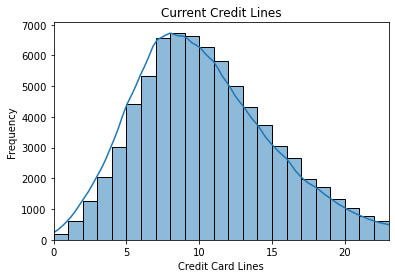

In [101]:
#Plot without outliers
binsize = 1
bins = np.arange(0, new_df['CurrentCreditLines'].max()+binsize, binsize)
plt.ylabel('Frequency')
plt.xlabel('Credit Card Lines')
plt.title('Current Credit Lines')
plt.xlim(0,outlier_thr+binsize)
sb.histplot( new_df["CurrentCreditLines"], kde=True, bins=bins);

Most borrowers have between 7 and 13 credit card lines. However, there are 2327 borrowers with exceptionally a bigger number of credit lines. It will be interesting to see their loan status.

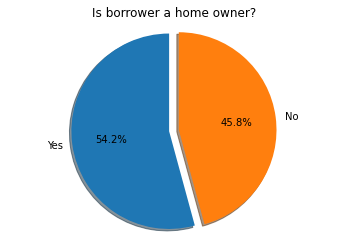

In [50]:
# Nineth: IsBorrowerHomeowner
# Source: https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html

new_df['IsBorrowerHomeowner'].value_counts()

labels = ['Yes', 'No']
sizes = [42045, 35479]
explode = (0.1, 0) 


fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal') 
plt.title('Is borrower a home owner?')

plt.show()

Around half of the borrowers are home owners (54.2%).

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

The univariate exploratory analysis showed that 6.8% of its borrowers have been charged off or defaulted which will be interesting to focus on in the following analysis. Also, most of the borrowers have debt consolidation loans with loan amounts varying largely. Most of the borrowers are employed homeowners with a medium income asking for a 3-year term loan. Prosper gave a medium rating a score to most of its borrowers.

There are several outliers present when it comes to debt-to-income ratio and credit card lines. It will be interesting to keep them throughout the analysis since they may provide interesting insights regarding their loan status.


### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

The following operations were performed on the data:

- `LoanStatus`: all past due loans were grouped together in a single category "Past Due".
- `IncomeRange`: recategorized into low, medium and high income ranges.

Some unusual distributions were also discovered:
- `EmploymentStatusDuration` was highly skewed to the right.
- `DebtToIncomeRatio` and `CurrentCreditLines` had several high outliers.


## Bivariate Exploration


In [109]:
numeric_vars = ['ProsperRating (numeric)', 'ProsperScore', 'EmploymentStatusDuration', 'DebtToIncomeRatio', 'LoanOriginalAmount',  'CurrentCreditLines']
categoric_vars = ['LoanStatus', 'EmploymentStatus',  'ListingCategory', 'IncomeRange', 'IsBorrowerHomeowner','Term']

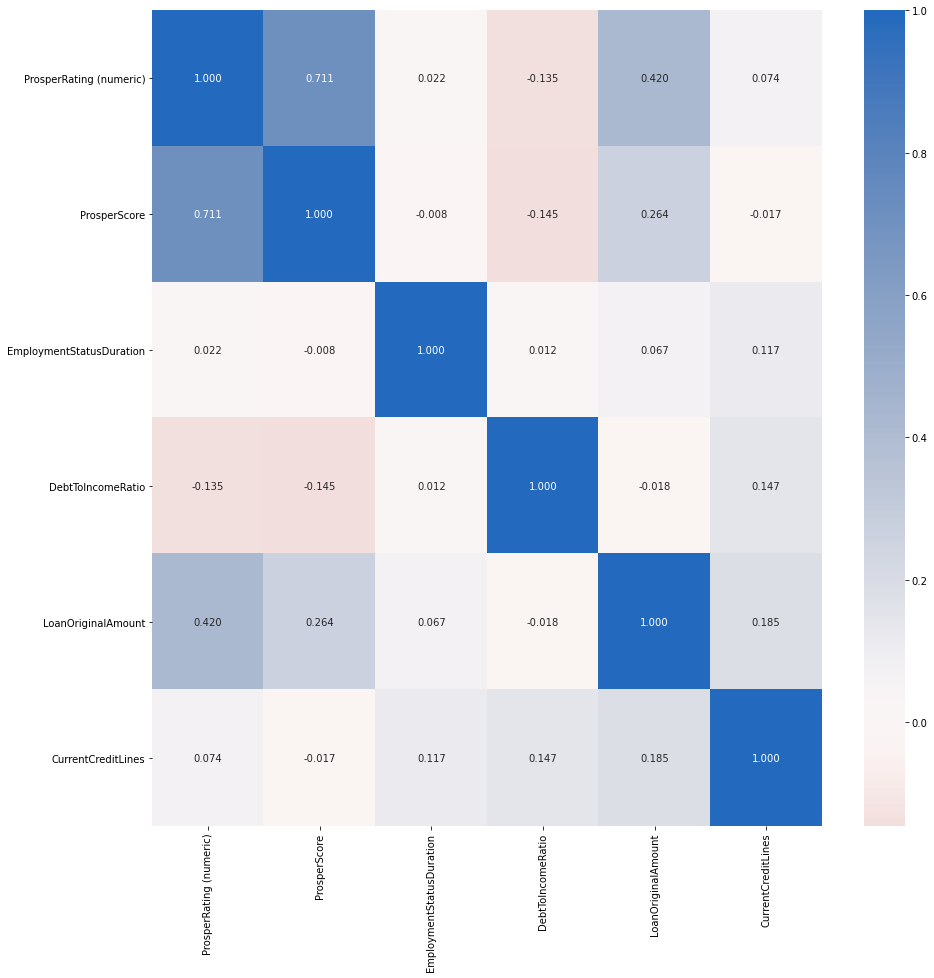

In [110]:
# First: correlation plot for numeric variables
plt.figure(figsize = [15, 15])
sb.heatmap(new_df[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

We observe some interesting correlations:
- There is a high positive correlation beween the ratings and scores given by Prosper to their borrowers.
- There is a moderate positive relation between the original loan amount asked by the borrower and their Prosper rating, which makes sense as Prosper will not grant larger loans except to borrowers with higher ratings.

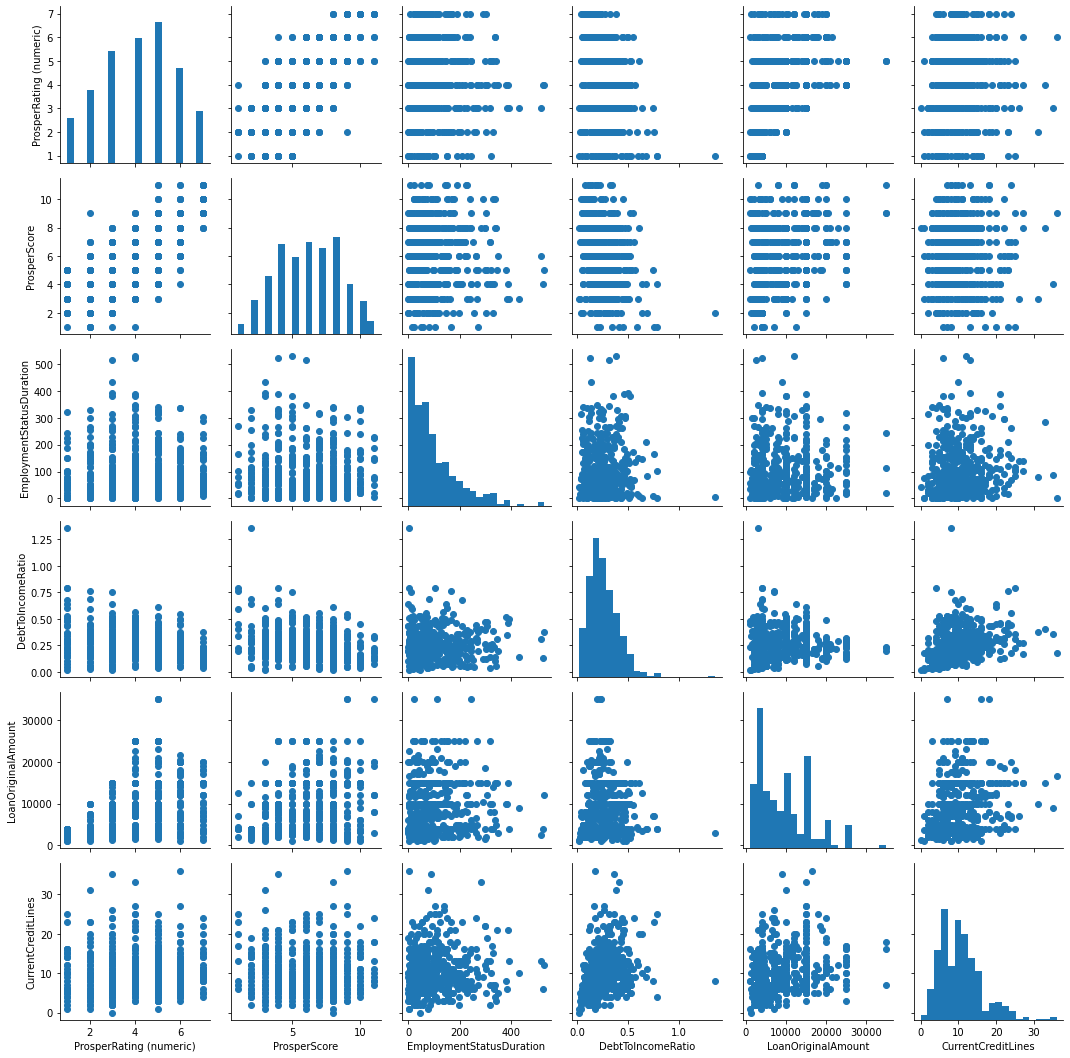

In [111]:
# plot matrix: sample 500 loans so that plots are clearer and
samples = np.random.choice(new_df.shape[0], 500, replace = False)
df_samp = new_df.loc[samples,:]

g = sb.PairGrid(data = df_samp, vars = numeric_vars)
g = g.map_diag(plt.hist, bins = 20);
g.map_offdiag(plt.scatter);

The scatter plots show an interesting linear relation between the current number of credit lines and debt-to-income ratio. A borrower with a higher debt-to-income ratio is likely to have many credit lines.

C:\Users\engia\Anaconda3\lib\site-packages\seaborn\axisgrid.py:1150: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(UserWarning(msg))
C:\Users\engia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\engia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\engia\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, th

<Figure size 1080x1080 with 0 Axes>

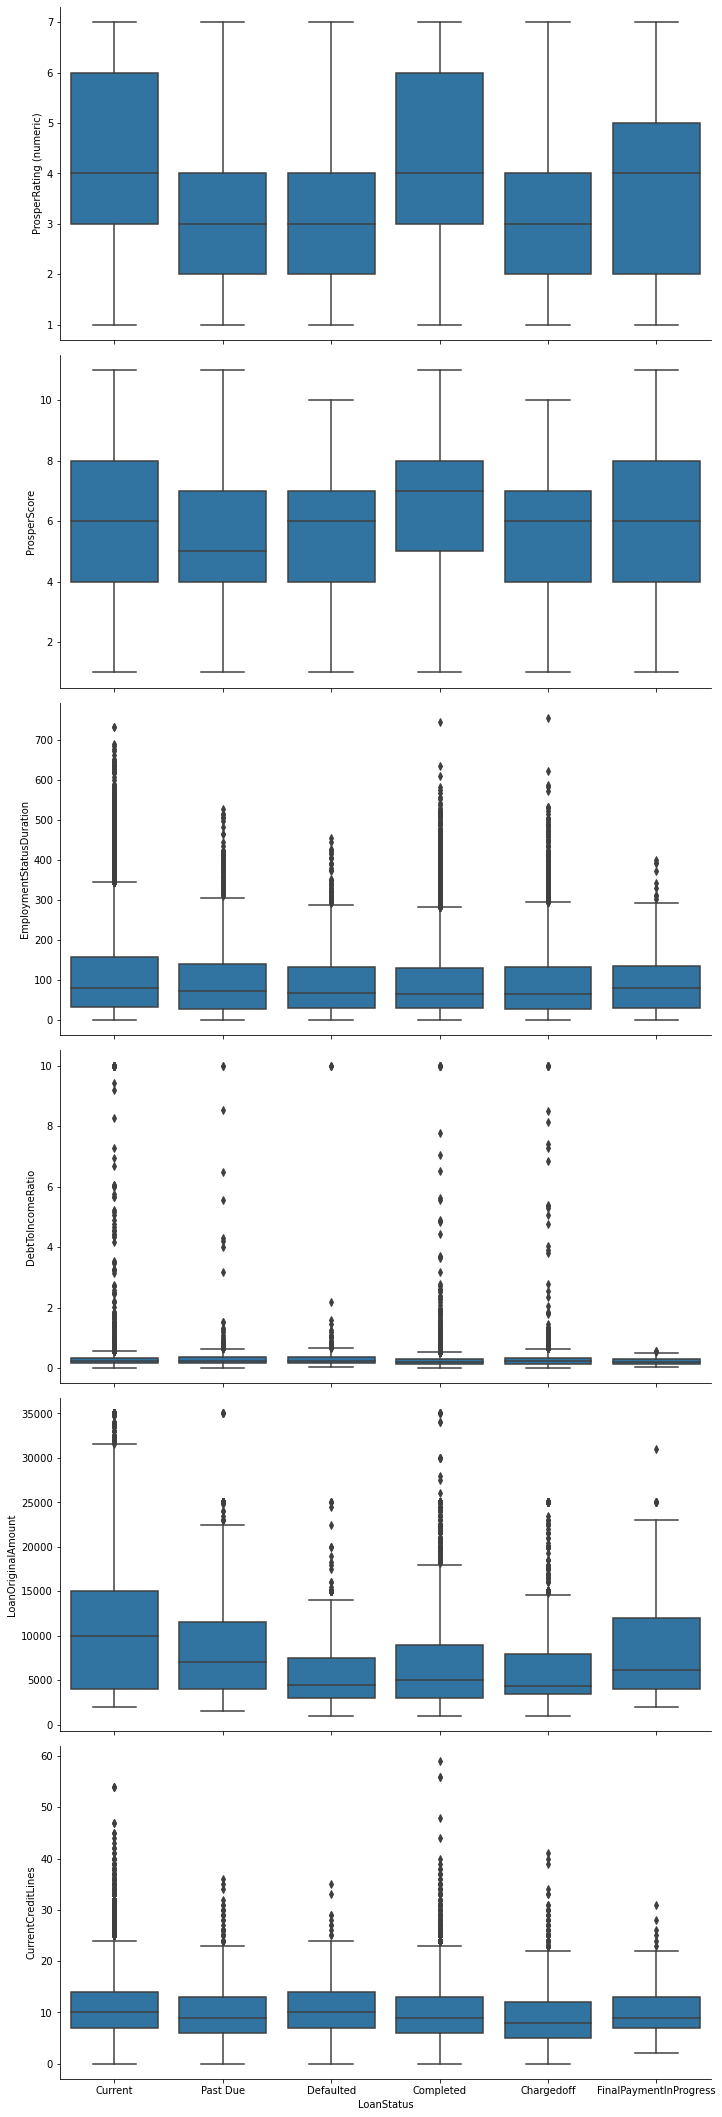

In [112]:
# Second: Investigating the relation between `LoanStatus` our variable of interest and all numeric variables using boxplots

def boxgrid(x, y, **kwargs):
    """ Quick hack for creating box plots with seaborn's PairGrid. """
    color = sb.color_palette()[0]
    sb.boxplot(x, y, color = color)

plt.figure(figsize = [15, 15])
g = sb.PairGrid(data = new_df, y_vars = numeric_vars, x_vars = 'LoanStatus',
                size = 5, aspect =2)
g.map(boxgrid)
plt.show();

The main observation that can be seen from the boxplots:
- Borrowers who are past due, have defaulted or charged off have lower Prosper scores and ratings than current borrowers.

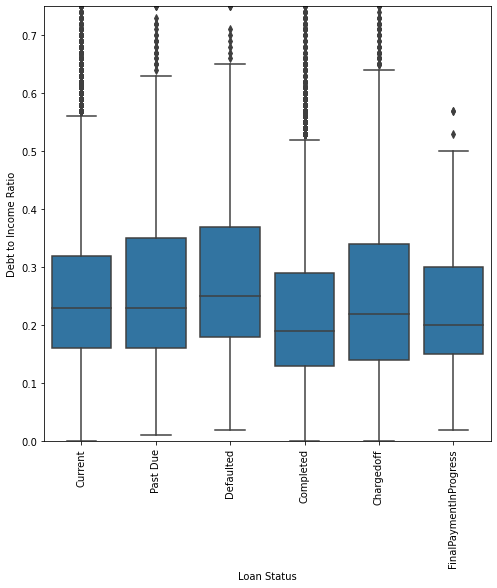

In [115]:
# Taking a closer look at LoanStatus and DebtToIncomeRatio
plt.figure(figsize = [8, 8])
color = sb.color_palette()[0]

ax1 = sb.boxplot(data=new_df, x='LoanStatus', y='DebtToIncomeRatio', color = color)
plt.xlabel('Loan Status')
plt.ylabel('Debt to Income Ratio')
plt.ylim(0,0.75)
plt.xticks(rotation=90);

As expected, borrowers who have defaulted have a higher median of debt-to-income ratio than all others.

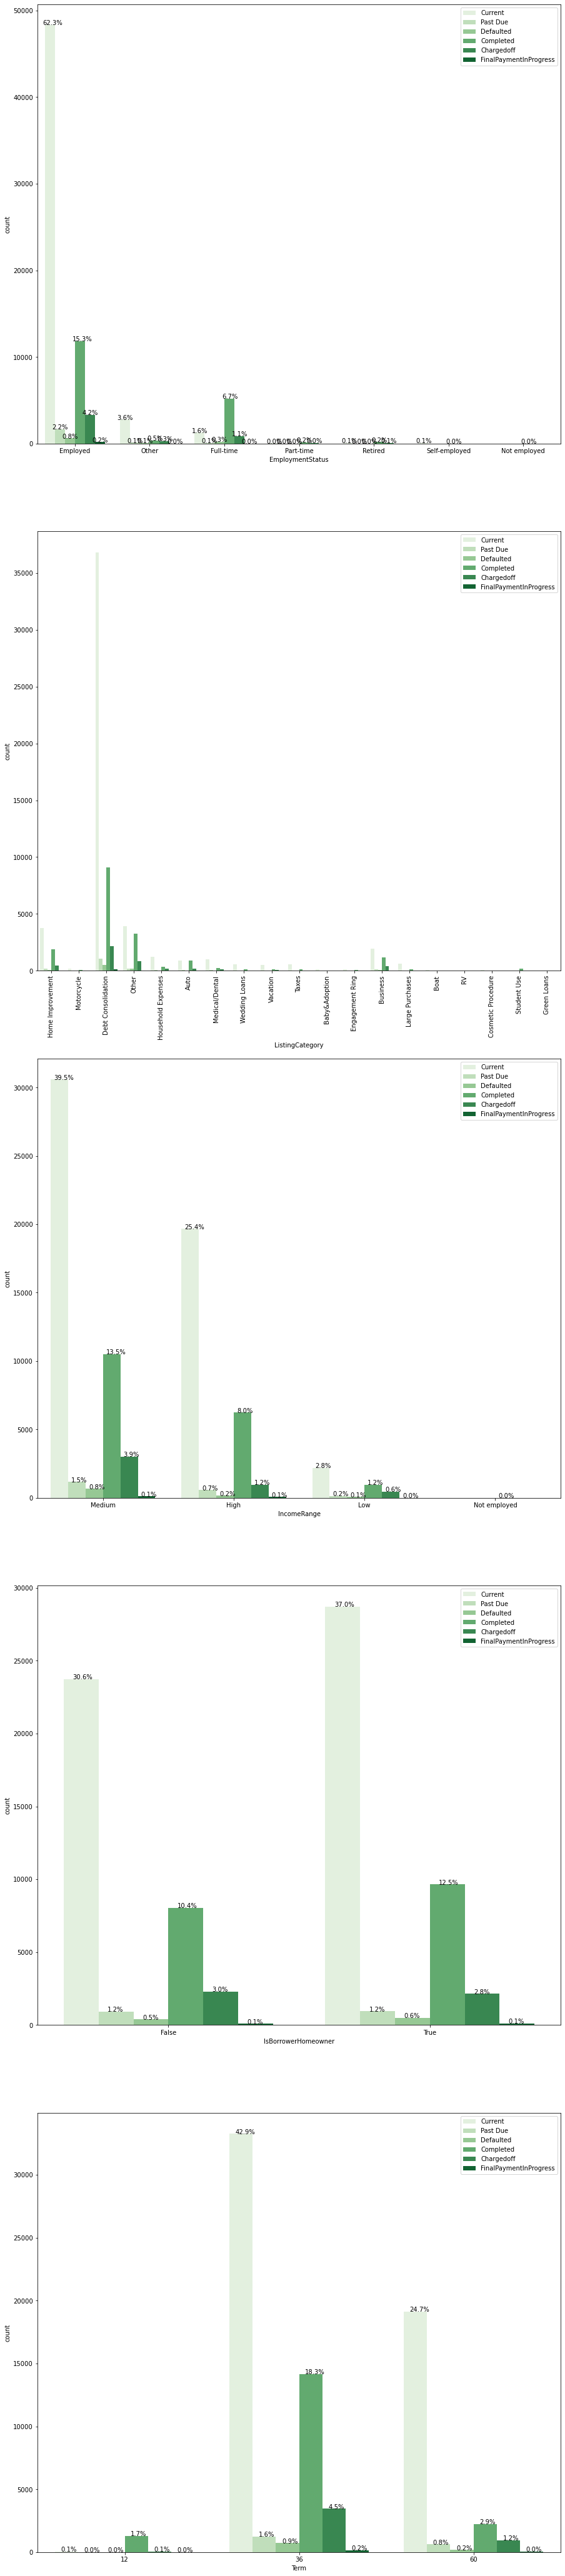

In [171]:
# Third: Investigating the relation between `LoanStatus` our variable of interest and other categorical variables


#categoric_vars = ['LoanStatus', 'EmploymentStatus',  'ListingCategory', 'IncomeRange', 'IsBorrowerHomeowner','Term']

plt.figure(figsize = [15, 75])


# subplot 1: EmploymentStatus vs LoanStatus
plt.subplot(5, 1,1)
ax1 = sb.countplot(data = new_df, x = 'EmploymentStatus', hue = 'LoanStatus', palette = 'Greens')
plt.legend(loc='upper right')
total1 = len(new_df['EmploymentStatus'])
for p in ax1.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total1)
        x = p.get_x() + p.get_width() / 3 -0.08
        y = p.get_y() + p.get_height() + 15
        ax1.annotate(percentage, (x, y))


# subplot 2: ListingCategory vs. LoanStatus
ax2=plt.subplot(5, 1, 2)
sb.countplot(data = new_df, x = 'ListingCategory', hue = 'LoanStatus',palette = 'Greens')
plt.legend(loc='upper right')
plt.xticks(rotation=90)
#total2 = len(new_df['ListingCategory'])
#for p in ax2.patches:
#        percentage = '{:.1f}%'.format(100 * p.get_height()/total2)
#        x = p.get_x() + p.get_width() /3 -0.02
#        y = p.get_y() + p.get_height() 
#        ax2.annotate(percentage, (x, y))


# subplot 3: IncomeRange vs. LoanStatus
ax3 = plt.subplot(5, 1, 3)
sb.countplot(data = new_df, x = 'IncomeRange', hue = 'LoanStatus', palette = 'Greens')
plt.legend(loc='upper right')
total3 = len(new_df['IncomeRange'])
for p in ax3.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total3)
        x = p.get_x() + p.get_width() /3 -0.02 
        y = p.get_y() + p.get_height() 
        ax3.annotate(percentage, (x, y))


# subplot 4: IsBorrowerHomeowner vs. LoanStatus
ax4 = plt.subplot(5, 1, 4)
sb.countplot(data = new_df, x = 'IsBorrowerHomeowner', hue = 'LoanStatus', palette = 'Greens')
plt.legend(loc='upper right')
total4 = len(new_df['IsBorrowerHomeowner'])
for p in ax4.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total4)
        x = p.get_x() + p.get_width() /3 -0.01
        y = p.get_y() + p.get_height() 
        ax4.annotate(percentage, (x, y))


# subplot 5: Term vs. LoanStatus
ax5 = plt.subplot(5, 1, 5)
sb.countplot(data = new_df, x = 'Term', hue = 'LoanStatus', palette = 'Greens')
plt.legend(loc='upper right')
total5 = len(new_df['Term'])
for p in ax5.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total5)
        x = p.get_x() + p.get_width() /3 -0.01
        y = p.get_y() + p.get_height() 
        ax5.annotate(percentage, (x, y))


plt.show()

We observe the following:
- 5% of the borrowers in Prosper are employed but still defaulted or were charged off.
- Most of those who defaulted reported 'other' in their listing.
- Surprisingly, most of those who default have high or medium income rating not low.
- Most borrowers ask for a 36-month loan term, 4.5% default.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

- Borrowers who have defaulted have a higher median of debt-to-income ratio than all others.
- 5% of the borrowers in Prosper are employed but still defaulted or were charged off. This requires further investigation
- Most of those who defaulted reported 'other' in their listing. This requires Prosper to look into more detail into the listings of their borrowers
- Most of those who default have high or medium income rating not low.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

- There is a positive linear relation between the current number of credit lines and debt-to-income ratio. A borrower with a higher debt-to-income ratio is likely to have many credit lines.
- There is a positive relationship between Prosper's score/rating and the original loan amount.

## Multivariate Exploration

In this part we investigate the interplay between LoanStatus and some other variables.

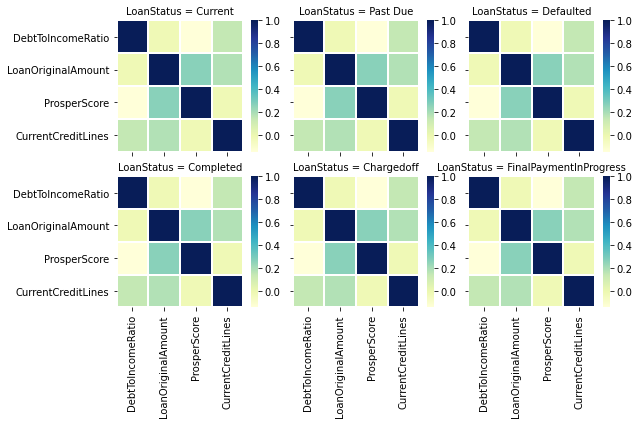

In [210]:
#Source: https://stackoverflow.com/questions/29592306/plotting-correlation-heatmaps-with-seaborn-facetgrid

hm = ['DebtToIncomeRatio', 'LoanOriginalAmount','ProsperScore', 'CurrentCreditLines']
hm_df = new_df[hm]


g = sb.FacetGrid(new_df, col='LoanStatus', col_wrap = 3, height = 3)
g.map_dataframe(lambda data, color: sb.heatmap(hm_df.corr(), linewidths=1, cmap="YlGnBu"));

plt.show()

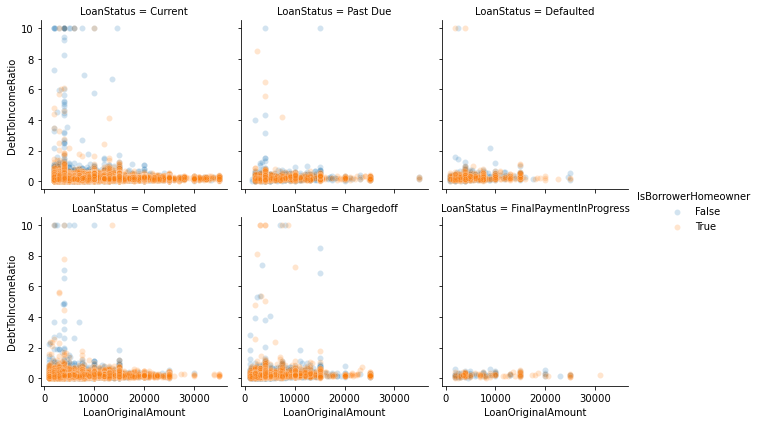

In [226]:
g = sb.FacetGrid(new_df, col = "LoanStatus", hue = "IsBorrowerHomeowner", col_wrap = 3, height = 3)
g.map(sb.scatterplot,  "LoanOriginalAmount", "DebtToIncomeRatio", alpha=0.2)
g.add_legend();

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

**For borrowers of current loans**
- There is a positive correlation between original loan amount and Prosper's score.
- There is a positive correlation between number of credit lines and debt-to-income ratio.
- Those who have highest debt-to-income ratio are not home owners.
- Most of current borrowers who ask for higher orginal loan amount are home owners.

**For borrowers whose loans are past due**
- There is a positive correlation between original loan amount and Prosper's score.
- There is a positive correlation between number of credit lines and debt-to-income ratio.
- Do not have very high debt-to-income ratio.
- Are mostly home owners.


**For borrowers whose loans defaulted**
- There is a positive correlation between original loan amount and Prosper's score.
- There is a positive correlation between number of credit lines and debt-to-income ratio.
- Are mostly home owners.
- Have mostly asked for loans less than 20,000 dollars.

**For borrowers whose loans are complete**
- There is a positive correlation between original loan amount and Prosper's score.
- There is a positive correlation between number of credit lines and debt-to-income ratio.
- Are mostly home owners.
- Have mostly asked for loans less than 20,000 dollars.
- Those who had the largest debt-to-income ratio were the ones who asked for lower original loan amounts.

**For borrowers whose loans are charged off**
- There is a positive correlation between original loan amount and Prosper's score.
- There is a positive correlation between number of credit lines and debt-to-income ratio.
- Are mostly home owners.
- Have mostly asked for loans less than 20,000 dollars.
- Those who have the highest debt-to-income ratio are mostly none home owners.


**For borrowers whose final payments are in progress**
- There is a positive correlation between original loan amount and Prosper's score.
- There is a positive correlation between number of credit lines and debt-to-income ratio.
- All have low debt-to-income ratio.


### Were there any interesting or surprising interactions between features?

- The relation between the original loan amount and Prosper's score, which ensures that Prosper grants larger loans only to borrowers with the highest scores who are less likely to default.
- The relation between the number of credit lines and debt-to-income ratio which is a red flag for risk analysts to watch for. If a borrower has too many credit lines, then they are not doing a great job managing their debts.

### Final Conclusion

It looks like Prosper is keeping very good track of the loan statues and their borrowers' characteristics making sure that most of the borrowers are employed, have medium to high income and that loans that default are kept at minimum.